In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
titanic_df[titanic_df['Embarked'].isnull()==True]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [54]:
female_df = titanic_df[titanic_df.Sex=='female']
print("female length :",len(female_df))
a=len(female_df[female_df['Survived']==1])
print("female length survived",a)

female length : 314
female length survived 233


In [55]:
male_df = titanic_df[titanic_df['Sex']=='male']
print("male length :",len(male_df))
b=len(male_df[male_df['Survived']==1])
print("male length survived",b)

male length : 577
male length survived 109


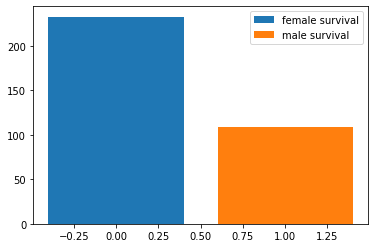

In [56]:
labels=['male','female']
y=len(titanic_df)

plt.bar(0,a,label='female survival')
plt.bar(1,b,label='male survival')
plt.legend()
plt.show()

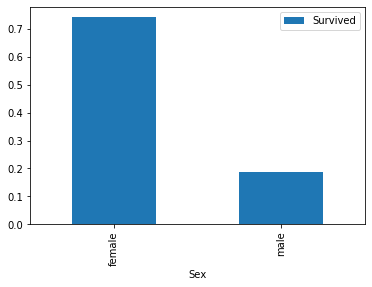

In [57]:
sex_pivot = titanic_df.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar()
plt.show()

In [58]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
#titanic_df1 = titanic_df[titanic_df['Embarked'].isnull()==False]
titanic_df['Embarked']=titanic_df['Embarked'].fillna('C')
titanic_df.describe()
titanic_df1=titanic_df

In [60]:
age_df = titanic_df.Age[titanic_df['Survived']==1]
age_df

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [61]:
total_pass = titanic_df['Pclass'].value_counts( sort=False)#.sort_index()
print(total_pass)
pclass=titanic_df.groupby('Pclass')['Survived'].sum()
pclass

1    216
2    184
3    491
Name: Pclass, dtype: int64


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

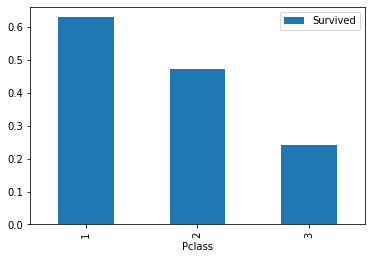

In [62]:
class_pivot = titanic_df.pivot_table(index='Pclass',values='Survived')
class_pivot.plot.bar()
plt.show()

In [63]:
print(titanic_df.Survived)
titanic_df.loc[: ,'Survived']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

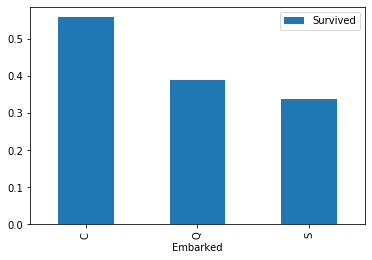

In [64]:
embark_pivot = titanic_df.pivot_table(index='Embarked', values='Survived')
embark_pivot.plot.bar()
plt.show()
#this shows that c category people survived most


In [65]:
correlation_matrix = titanic_df.corr(method='pearson')
correlation_matrix
#with this correlation matrix we can understand what factors influence survival of a person

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


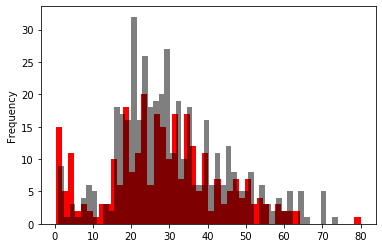

In [66]:
survived = titanic_df[titanic_df['Survived']==1]
died = titanic_df[titanic_df['Survived']==0]
survived['Age'].plot.hist(color='r',bins=50)
died['Age'].plot.hist(alpha=0.5, color='k',bins=50)

In [67]:
titanic_df.describe()
#mean_age=titanic_df['Age'][titanic_df['Age'].all()<40 and titanic_df['Age'].all()>18]
age=titanic_df['Age']
print(titanic_df['Age'].min())
age_list=[]
for i in age:
    if i>18 and i<40:
        age_list.append(i)
from statistics import mode as mean
mean(age_list)

0.42


24.0

In [68]:
titanic_df1['Age'].fillna(29.699,inplace=True)
titanic_df1.describe()
#titanic_df1=titanic_df[titanic_df['Embarked'].isnull==False]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699094,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
x_titanic = titanic_df1[['Age','Pclass','Sex','Embarked','Parch']]
y_titanic = titanic_df1['Survived']
x_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Age         891 non-null float64
Pclass      891 non-null int64
Sex         891 non-null object
Embarked    891 non-null object
Parch       891 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [72]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
age=scaler.fit_transform(np.array(x_titanic['Age']).reshape(-1,1))
x_titanic['Age']=age


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#age=scaler.fit_transform(np.array(x_titanic['Age']).reshape(-1,1))
#x_titanic['Age']=age
print(x_titanic)
x_titanic1= pd.get_dummies(x_titanic, columns=["Pclass","Sex","Embarked","Parch"])
x_titanic1.describe()

          Age  Pclass     Sex Embarked  Parch
0   -0.592479       3    male        S      0
1    0.638791       1  female        C      0
2   -0.284661       3  female        S      0
3    0.407928       1  female        S      0
4    0.407928       3    male        S      0
..        ...     ...     ...      ...    ...
886 -0.207707       2    male        S      0
887 -0.823342       1  female        S      0
888 -0.000007       3  female        S      2
889 -0.284661       1    male        C      0
890  0.177065       3    male        Q      0

[891 rows x 5 columns]


,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-6.962257e-17,0.242424,0.206510,0.551066,0.352413,0.647587,0.190797,0.086420,0.722783,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122
std,1.000562e+00,0.428790,0.405028,0.497665,0.477990,0.477990,0.393150,0.281141,0.447876,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501
min,-2.253154e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.924788e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.254956e-06,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.079278e-01,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.870874e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
x_titanic1=x_titanic1.drop(columns=["Parch_0"])
x_titanic1

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,-0.592479,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0.638791,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.284661,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,0.407928,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0.407928,0,0,1,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207707,0,1,0,0,1,0,0,1,0,0,0,0,0,0
887,-0.823342,1,0,0,1,0,0,0,1,0,0,0,0,0,0
888,-0.000007,0,0,1,1,0,0,0,1,0,1,0,0,0,0
889,-0.284661,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [75]:
x_titanic2=x_titanic1.join(titanic_df['Survived'])
correlation_matrix1 = x_titanic2.corr(method = 'pearson')
correlation_matrix1

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Survived
Age,1.000000,0.319917,0.006590,-0.281005,-0.084153,0.084153,0.040804,-0.013856,-0.027120,-0.147908,-0.256435,0.020239,0.076487,0.054925,0.034310,-0.069808
Pclass_1,0.319917,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.305181,-0.155342,-0.170379,0.018496,0.014713,-0.042496,0.001187,-0.042496,-0.018962,0.285904
Pclass_2,0.006590,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.127763,-0.127301,0.192061,0.062425,-0.005051,0.035908,-0.034258,-0.038324,-0.017100,0.093349
Pclass_3,-0.281005,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.158965,0.237449,-0.009511,-0.066741,-0.008566,0.007391,0.026859,0.067804,0.030255,-0.322308
Sex_female,-0.084153,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.090223,0.074115,-0.125722,0.127636,0.170993,0.070383,0.020746,0.070383,0.045439,0.543351
Sex_male,0.084153,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.090223,-0.074115,0.125722,-0.127636,-0.170993,-0.070383,-0.020746,-0.070383,-0.045439,-0.543351
Embarked_C,0.040804,0.305181,-0.127763,-0.158965,0.090223,-0.090223,1.000000,-0.149345,-0.784064,0.063082,-0.012627,0.001760,-0.032608,-0.036477,-0.016277,0.174718
Embarked_Q,-0.013856,-0.155342,-0.127301,0.237449,0.074115,-0.074115,-0.149345,1.000000,-0.496624,-0.049463,-0.082626,-0.023105,-0.020654,0.030366,-0.010310,0.003650
Embarked_S,-0.027120,-0.170379,0.192061,-0.009511,-0.125722,0.125722,-0.784064,-0.496624,1.000000,-0.024325,0.062950,0.012959,0.041589,0.012959,0.020759,-0.155660
Parch_1,-0.147908,0.018496,0.062425,-0.066741,0.127636,-0.127636,0.063082,-0.049463,-0.024325,1.000000,-0.122712,-0.029351,-0.026237,-0.029351,-0.013097,0.134174


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_titanic1,y_titanic, test_size = 0.3, random_state=0)


In [77]:
#function to build confusion matrix
def build_con_matrix(size,y_test1,y_pred):
    tp=0
    tn=0
    fp=0
    fn=0

    for i in range(size):
        if(y_test1[i] == 1 and y_pred[i] ==1):
            tp+=1
        elif(y_test1[i] == 0 and y_pred[i] ==0):
          
            tn+=1
        elif(y_test1[i] == 1 and y_pred[i] ==0):
            fn=fn+1
            
        else:
            fp+=1
    print(tp,fp,fn,tn)

    acc_score=(tp+tn)/(tp+tn+fp+fn)
    prec_score = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*(prec_score*recall)/(recall+prec_score)
    return(acc_score,prec_score,recall,f1_score)
    

In [78]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(min_samples_split=70,min_samples_leaf=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print("actual acc_score :",accuracy_score(y_test,y_pred))
print("actual precision_score :",precision_score(y_test,y_pred))
print("actual recall :",recall_score(y_test,y_pred))
print("actual f1_score :",f1_score(y_test,y_pred))
y_test1=np.array(y_test)
acc_score,prec_score,recall1,f1_score = build_con_matrix(len(y_pred),y_test1,y_pred)
print("....accuracy score : ",acc_score,"\n....prec_score is :",prec_score,\
      "\n....recall is :",recall1,"\n....f1_score is :",f1_score)
print(confusion_matrix(y_test,y_pred))
     


actual acc_score : 0.8134328358208955
actual precision_score : 0.8205128205128205
actual recall : 0.64
actual f1_score : 0.7191011235955057
64 14 36 154
....accuracy score :  0.8134328358208955 
....prec_score is : 0.8205128205128205 
....recall is : 0.64 
....f1_score is : 0.7191011235955057
[[154  14]
 [ 36  64]]


In [79]:
actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] 
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] 
results = confusion_matrix(actual, predicted) 
print(results)
acc_score,prec_score,recall1,f1_score = build_con_matrix()

[[4 2]
 [1 3]]


TypeError: build_con_matrix() missing 3 required positional arguments: 'size', 'y_test1', and 'y_pred'

#RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,min_samples_split=45,random_state=20)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("actual acc_score :",accuracy_score(y_test,y_pred))
print("actual precision_score :",precision_score(y_test,y_pred))
print("actual recall :",recall_score(y_test,y_pred))
print("actual f1_score :",f1_score(y_test,y_pred))
y_test1=np.array(y_test)
print("\n\t***************\n")

acc_score,prec_score,recall,f1_score = build_con_matrix(len(y_pred),y_test1,y_pred)
print("....accuracy score : ",acc_score,"\n....prec_score is :",prec_score,\
      "\n....recall is :",recall,"\n....f1_score is :",f1_score)

actual acc_score : 0.8208955223880597
actual precision_score : 0.8714285714285714
actual recall : 0.61
actual f1_score : 0.7176470588235295

	***************

61 9 39 159
....accuracy score :  0.8208955223880597 
....prec_score is : 0.8714285714285714 
....recall is : 0.61 
....f1_score is : 0.7176470588235295


#LOGISTIC REGRESSION

In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='sag',multi_class='multinomial').fit(x_train, y_train)
y_pred = clf.predict(x_test)
#accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("actual acc_score :",accuracy_score(y_test,y_pred))
print("actual precision_score :",precision_score(y_test,y_pred))
print("actual recall :",recall_score(y_test,y_pred))
print("actual f1_score :",f1_score(y_test,y_pred))
y_test1=np.array(y_test)
print("\n\t***************\n")

acc_score1,prec_score1,recall1,f1_score1 = build_con_matrix(len(y_pred),y_test1,y_pred)
print("....accuracy score : ",acc_score1,"\n....prec_score is :",prec_score1,\
      "\n....recall is :",recall1,"\n....f1_score is :",f1_score1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

actual acc_score : 0.8022388059701493
actual precision_score : 0.7373737373737373
actual recall : 0.73
actual f1_score : 0.7336683417085427

	***************

73 26 27 142
....accuracy score :  0.8022388059701493 
....prec_score is : 0.7373737373737373 
....recall is : 0.73 
....f1_score is : 0.7336683417085427
[[142  26]
 [ 27  73]]


#knn

In [82]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("actual acc_score :",accuracy_score(y_test,y_pred))
print("actual precision_score :",precision_score(y_test,y_pred))
print("actual recall :",recall_score(y_test,y_pred))
print("actual f1_score :",f1_score(y_test,y_pred))
y_test1=np.array(y_test)
print("\n\t***************\n")

acc_score1,prec_score1,recall1,f1_score1 = build_con_matrix(len(y_pred),y_test1,y_pred)
print("....accuracy score : ",acc_score1,"\n....prec_score is :",prec_score1,\
      "\n....recall is :",recall1,"\n....f1_score is :",f1_score1)

actual acc_score : 0.7649253731343284
actual precision_score : 0.7126436781609196
actual recall : 0.62
actual f1_score : 0.6631016042780749

	***************

62 25 38 143
....accuracy score :  0.7649253731343284 
....prec_score is : 0.7126436781609196 
....recall is : 0.62 
....f1_score is : 0.6631016042780749


In [84]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_pred)
tp=cmat[0][0]
tn=cmat[1][1]
fp=cmat[0][1]
fn=cmat[1][0]
print(tp,tn)
acc_score=(tp+tn)/(tp+tn+fp+fn)
print(acc_score)

143 62
0.7649253731343284


In [85]:
for i in range(5):
    print(x_titanic.iloc[i].Sex)
    

male
female
female
female
male


In [86]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy ",accuracy_score( y_pred, y_test))
from sklearn.metrics import precision_score,f1_score,recall_score
print('precision ',precision_score(y_test, y_pred))
print('f1_score ',f1_score(y_test, y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("\nxxxxxxxxxxxxxx\n")
acc_score,prec_score,recall,f1_score = build_con_matrix(len(y_pred),y_test1,y_pred)
print("acc_score    :",acc_score,"\nprec_score   : ",prec_score,"\nrecall    : ",recall,'\nf1_score    : ',f1_score)

accuracy  0.3843283582089552
precision  0.37735849056603776
f1_score  0.5479452054794521
recall_score 1.0

xxxxxxxxxxxxxx

100 165 0 3
acc_score    : 0.3843283582089552 
prec_score   :  0.37735849056603776 
recall    :  1.0 
f1_score    :  0.5479452054794521


In [ ]:
for i in titanic_df.Sex=='Female':
    print(titanic_df.loc[0,:])